# Source of inspiration

From devblogs: [The Windows Subsystem for Linux in the Microsoft Store is now generally available on Windows 10 and 11](https://devblogs.microsoft.com/commandline/the-windows-subsystem-for-linux-in-the-microsoft-store-is-now-generally-available-on-windows-10-and-11/)

## What’s new in the Store version of WSL?[](https://devblogs.microsoft.com/commandline/the-windows-subsystem-for-linux-in-the-microsoft-store-is-now-generally-available-on-windows-10-and-11/#whats-new-in-the-store-version-of-wsl)

There are 100s of bug fixes and improvements that you can read through on our [release notes](https://github.com/microsoft/WSL/releases) page to see all the improvements that we’ve put into the Store version of WSL. In this blog post I’ll highlight some of the significant changes that you might see as a user upgrading to the Store version for the first time.

- You can opt in for [systemd support](https://devblogs.microsoft.com/commandline/systemd-support-is-now-available-in-wsl/)
- Windows 10 users can now use Linux GUI apps! This was previously only available to Windows 11 users
- `wsl --install` now includes:
    - Direct installation from the Microsoft Store by default
    - `--no-launch` option to not launch the distro after installing
    - `--web-download` option which will download the distro through our GitHub releases page rather than through the Microsoft Store
- `wsl --mount` now includes:
    - `--vhd` option to make mounting VHD files easier
    - `--name` option to make naming the mountpoint easier
- `wsl --import` and `wsl --export` now include:
    - `--vhd` option to import or export to a VHD directly
- Added `wsl --import-in-place` to take an existing .vhdx file and register it as a distro
- Added `wsl --version` to print your version information more easily
- `wsl --update` now includes:
    - Opening the Microsoft Store page by default
    - `--web-download` option to allow updates from our GitHub release page
- Better error printing
- All of WSLg and the WSL kernel are packaged into the same WSL package, meaning no more extra MSI installs!

# Testing these features

## systemd

following this article: [systemd support](https://aka.ms/wslsystemd)

Modify `/etc/wsl.conf` with

```bash
[boot]
systemd=true
```

And restart wsl image (`wsl -t ubuntu-22.04`)

Test that it works by running

```bash
systemctl list-unit-files --type=service
```

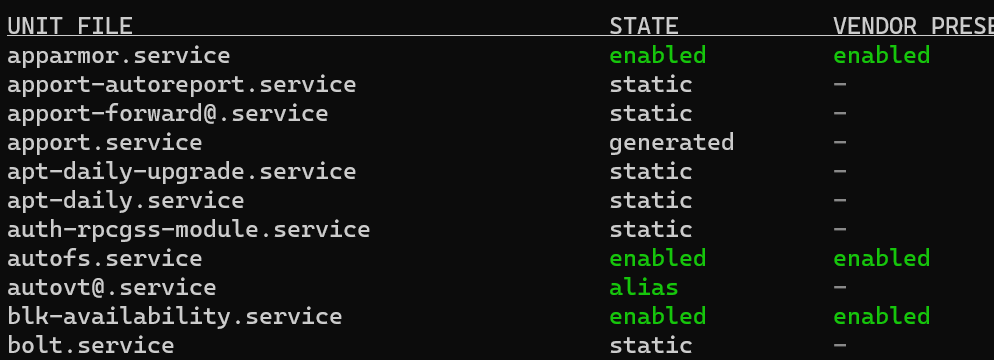

I can now use systemctl to manage services such as

```bash
sudo systemctl restart autofs.service
```

## snapd

Upgrade snap

```bash
sudo apt-get -y upgrade snapd
```

Check it is running
```bash
$ snap list
Name    Version        Rev    Tracking       Publisher   Notes
core20  20220318       1405   latest/stable  canonical✓  base
lxd     5.0.0-b0287c1  22923  5.0/stable/…   canonical✓  -
snapd   2.55.3         15534  latest/stable  canonical✓  snapd
```

## firefox

And install firefox
```bash
sudo snap install firefox
# due to a bug when opening settings
# https://answers.launchpad.net/ubuntu/+question/701403https://answers.launchpad.net/ubuntu/+question/701403
sudo apt install xdg-desktop-portal-gtksudo apt install xdg-desktop-portal-gtk
```
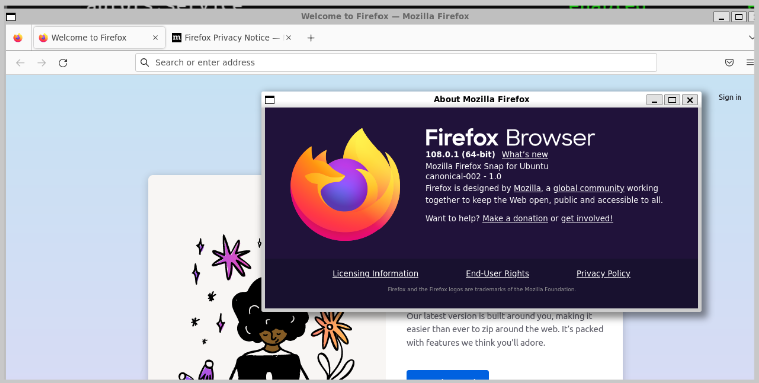

To allow external websites, import this certificate `/usr/local/share/ca-certificates/cert_M_X5C_sase-mob-sslfwd-trust-ca.crt` in the certificate manager

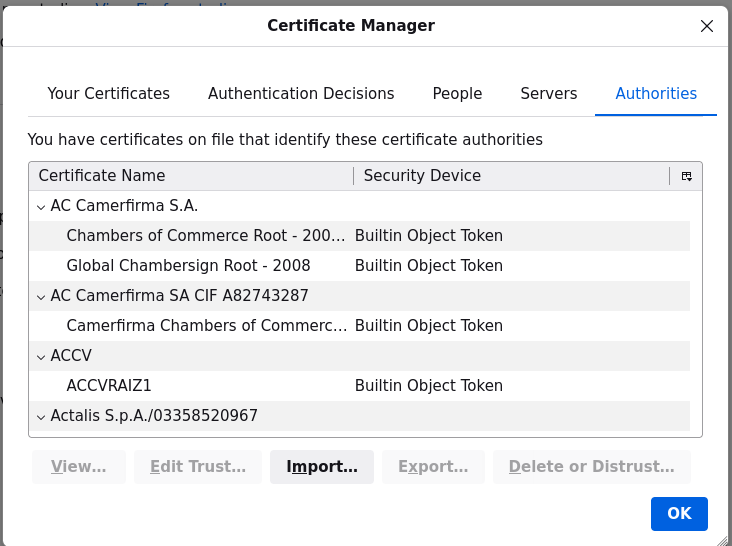

## nautilus

And install nautilus
```bash
sudo apt install nautilus nautilus-extension-gnome-terminal
```

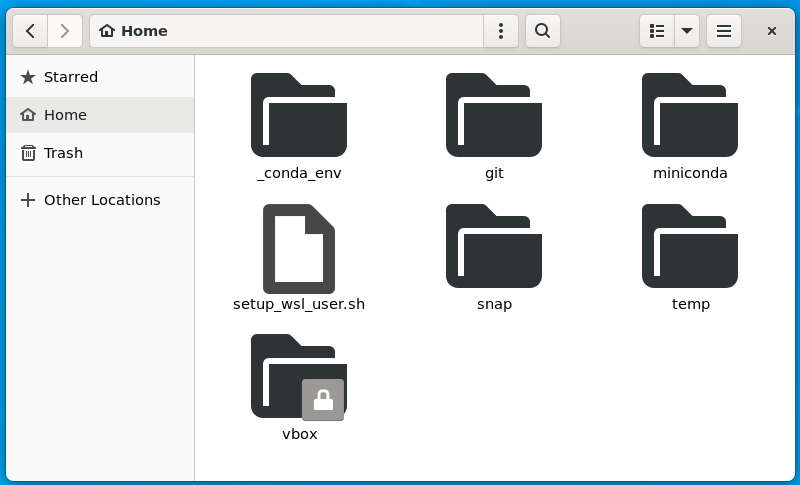

## gimp

And install gimp
```bash
sudo apt install gimp
```

## snap-store

I can install like for other softwares

```bash
sudo snap install snap-store
```

but it failed at installing anything

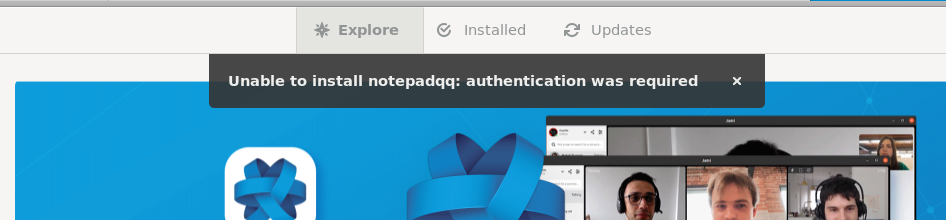

With these messages

```bash
14:15:34:0004 Gs  Could not set idle IO priority, attempting best effort of 7
14:15:34:0004 Gs  Could not set best effort IO priority either, giving up
```

## dropbox

This one is the official one but it fails

```bash
sudo apt install nautilus-dropbox
dropbox start -i
```

another one

```bash
rm -rf ~/.dropbox-dist ~/.dropbox
wget -q -O ~/dropbox https://www.dropbox.com/download?dl=packages/dropbox.py
chmod a+x ~/dropbox
DISPLAY='' dropbox start -i
```


but still no luck

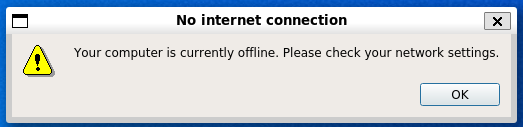

# Problems

## ERROR: CreateProcessParseCommon

When starting image after wsl update, I have the following error:

```bash
<3>WSL (8) ERROR: CreateProcessParseCommon:782: Failed to translate \\wsl.localhost\ubuntu-22.04\home\guillaume
```

I am not the only one, I have posted in [this issue](https://github.com/microsoft/WSL/issues/9252) from WSL github repo.

## Cannot install from snap-store

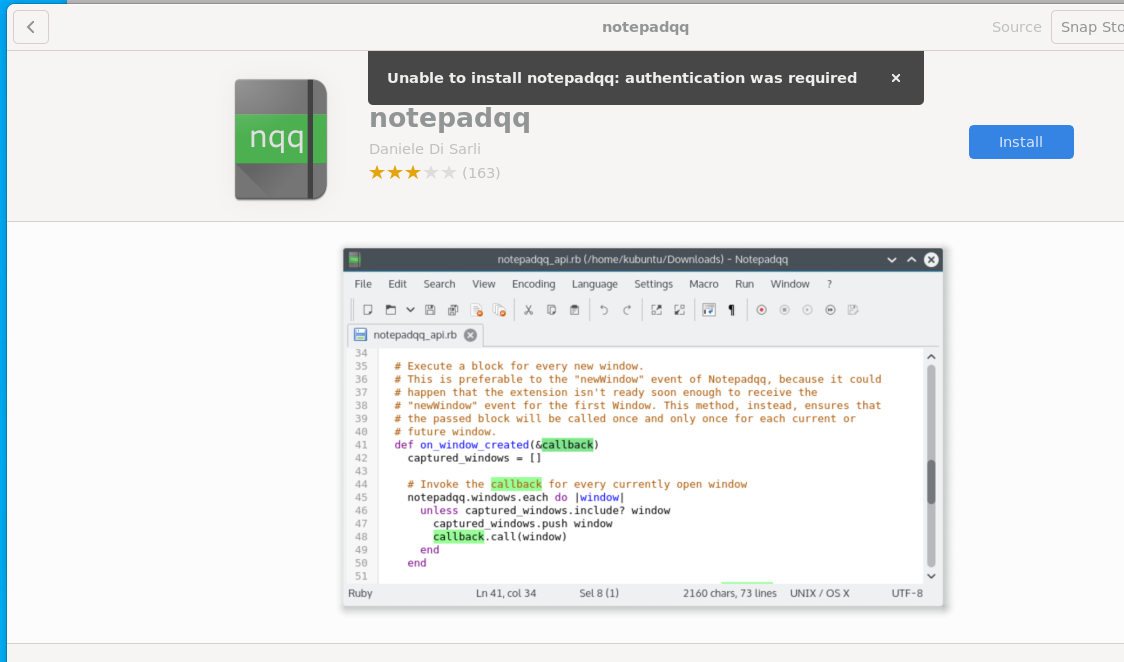

```bash
14:12:09:0637 Gs  not handling error no-security for action refresh: Failed to obtain authentication.
14:12:09:0638 Gs  not handling error not-supported for action get-updates-historical: The name org.freedesktop.fwupd was not provided by any .service files
```